## 1

In [1]:
f <- function(x) x^2

In [2]:
x <- seq(-10, 10, 0.1)
y <- f(x)

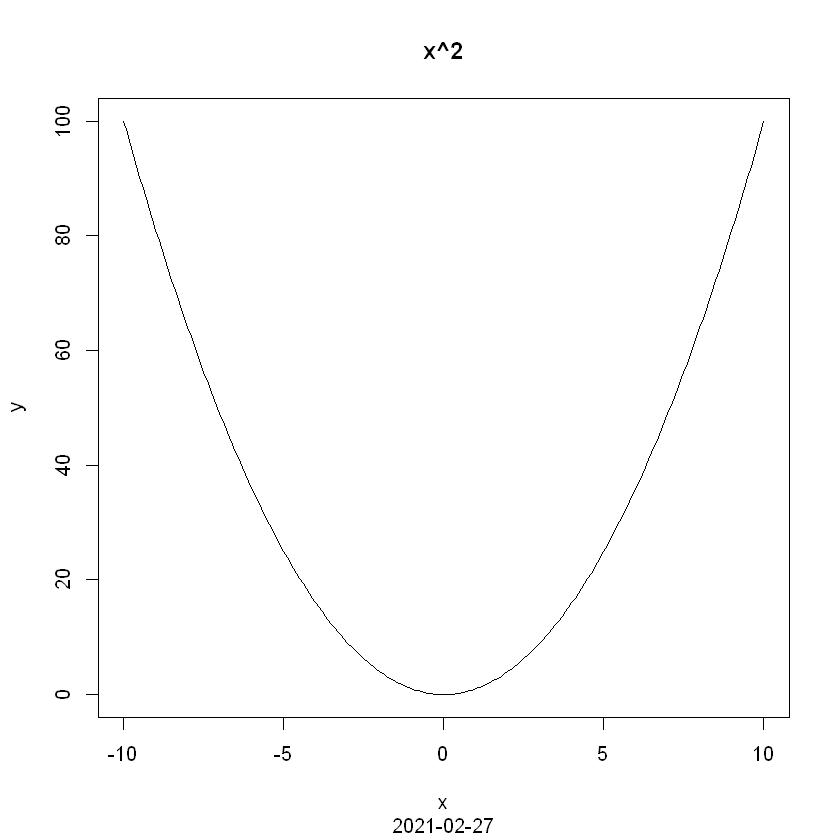

In [3]:
plot(x, y, type="l", main="x^2", sub=Sys.Date())

## 2

In [4]:
marks <- matrix(0, 4, 3)

Мы не можем в Jupyter использовать ``edit()``, поэтму лепим костыли

In [5]:
# edit(marks)

In [6]:
input_vector <- function(len, prompt="", elements=c(), handle=function(x) { as.numeric(x) }) {
    if (length(elements) == 0) {
        elements <- 1:len
    }
    vec = rep(c(0), len)
    
    for (i in 1:len) {
        vec[i] = handle(readline(prompt=paste(prompt, " оценка за ", elements[i], ":", sep="")))
    }
    
    return (vec)
}

In [7]:
input <- sapply(1:4, function (x) input_vector(3, prompt=paste("Студент", x), elements=c("Введение в профф", "Математическая логика", "Теория графов")))

Студент 1 оценка за Введение в профф: 3
Студент 1 оценка за Математическая логика: 3
Студент 1 оценка за Теория графов: 4
Студент 2 оценка за Введение в профф: 4
Студент 2 оценка за Математическая логика: 5
Студент 2 оценка за Теория графов: 4
Студент 3 оценка за Введение в профф: 4
Студент 3 оценка за Математическая логика: 4
Студент 3 оценка за Теория графов: 5
Студент 4 оценка за Введение в профф: 5
Студент 4 оценка за Математическая логика: 5
Студент 4 оценка за Теория графов: 5


In [8]:
input <- t(input)

In [9]:
rownames(input) <- sapply(1:length(input[,1]), function(x) paste("Студент", x))

Честно, не понятно, как нужно делать *круговую* диаграмму успеваемости

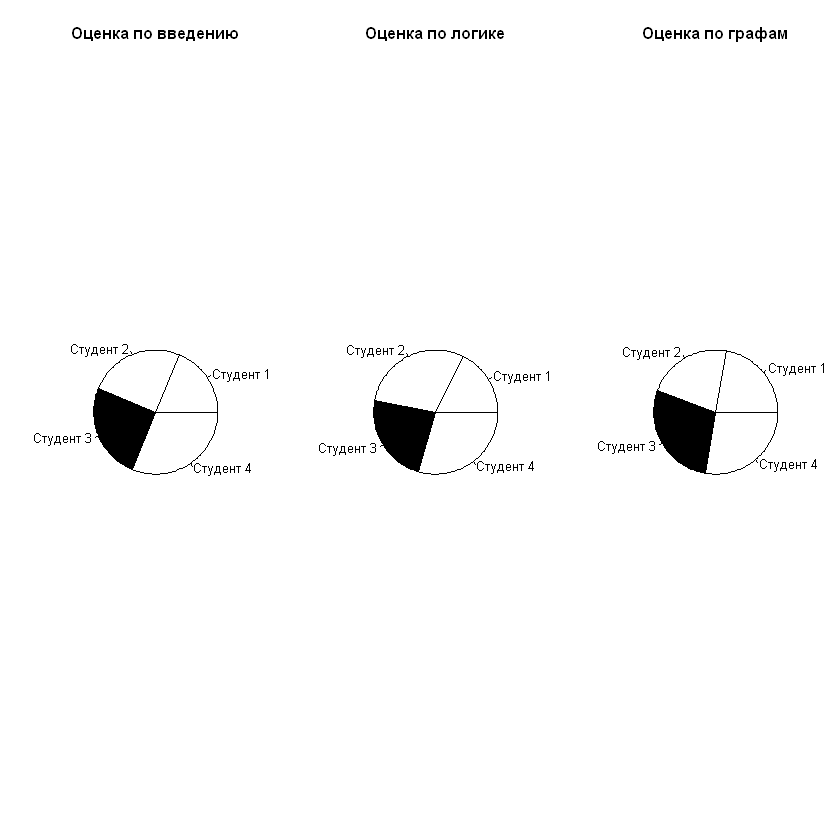

In [10]:
colours = c("white", "white", "black", "white")

par(mfrow=c(1,3))

pie(input[,1], cex=1, radius=0.75, main="Оценка по введению", col=colours)
pie(input[,2], cex=1, radius=0.75, main="Оценка по логике", col=colours)
pie(input[,3], cex=1, radius=0.75, main="Оценка по графам", col=colours)

## 3

In [11]:
expression_to_function <- function(expr, vars=c("x")) {
    expr <- as.expression(expr)
    
    vars_string <- ""
    if (length(vars) == 0) {
        vars_string <- ""
    }
    else if (length(vars) == 1) {
        vars_string <- as.character(vars)
    }
    else {
        for (var in vars) {
            vars_string <- paste(vars_string, as.character(var), sep=",")
        }
        vars_string <- sub(".", "", vars_string)
    }
    
    
    return (eval(parse(text=paste("(function(", vars_string, ") {", as.character(expr), "})"))))
}

In [12]:
f <- function(x) {
    (3*x^2 - 30*x + 74.417) / (x - 5)
}
f.expr = expression((3*x^2 - 30*x + 74.417) / (x - 5))
f(0)

[1] -14.8834

In [13]:
uniroot(f, interval=c(-10, 10))$root

[1] 5.440833

In [14]:
f.deriv <- D(f.expr, "x")
f.deriv

(3 * (2 * x) - 30)/(x - 5) - (3 * x^2 - 30 * x + 74.417)/(x - 
    5)^2

In [15]:
df <- expression_to_function(f.deriv)
df

function (x) 
{
    (3 * (2 * x) - 30)/(x - 5) - (3 * x^2 - 30 * x + 74.417)/(x - 
        5)^2
}
<environment: 0x000000004b71d730>

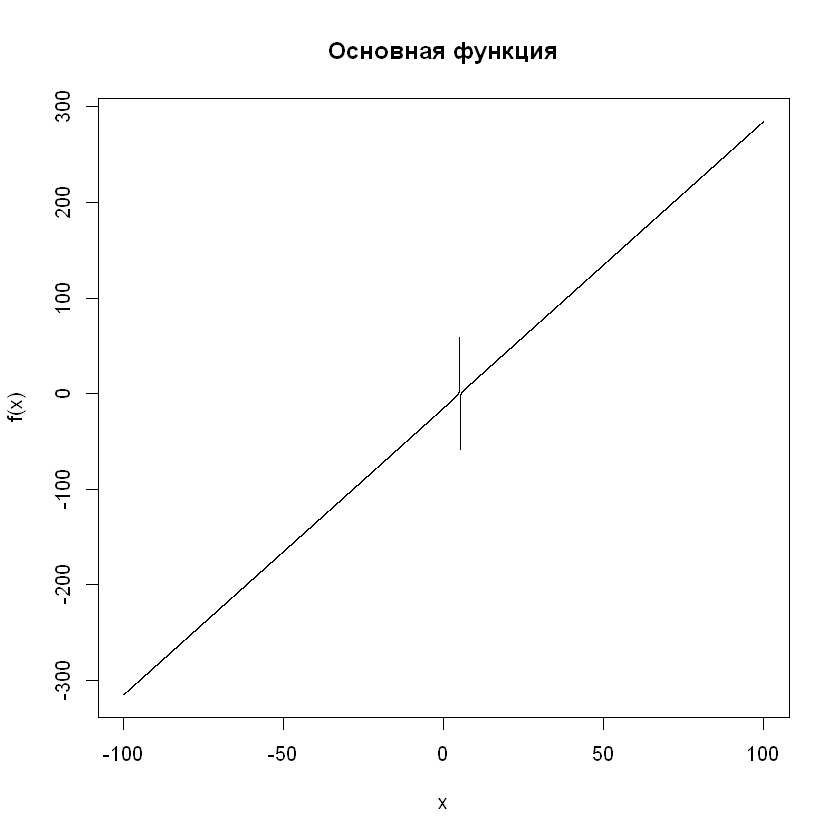

In [16]:
x <- seq(-100, 100, 0.01)

plot(x, f(x), type="l", main="Основная функция")

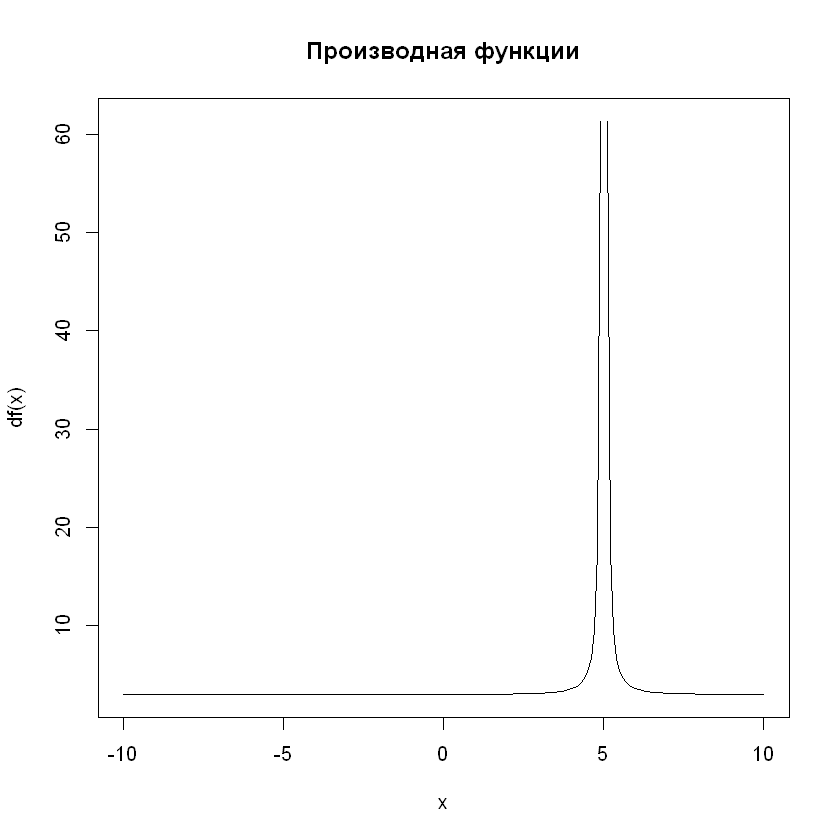

In [17]:
x <- seq(-10, 10, 0.1)

plot(x, df(x), type="l", main="Производная функции")

## 4

In [18]:
f <- function(x) {
    x^3 - 18*x^2 + 106.25*x - 205.5
}
f.expr <- expression(x^3 - 18*x^2 + 106.25*x - 205.5)
f(0)

[1] -205.5

In [19]:
uniroot(f, interval=c(-100, 100))$root

[1] 7.322898

In [20]:
d.deriv <- D(f.expr, "x")
d.deriv

3 * x^2 - 18 * (2 * x) + 106.25

In [21]:
df <- expression_to_function(d.deriv)
df(0)

[1] 106.25

In [22]:
uniroot(df, interval=c(-10, 6))$root

[1] 5.236239

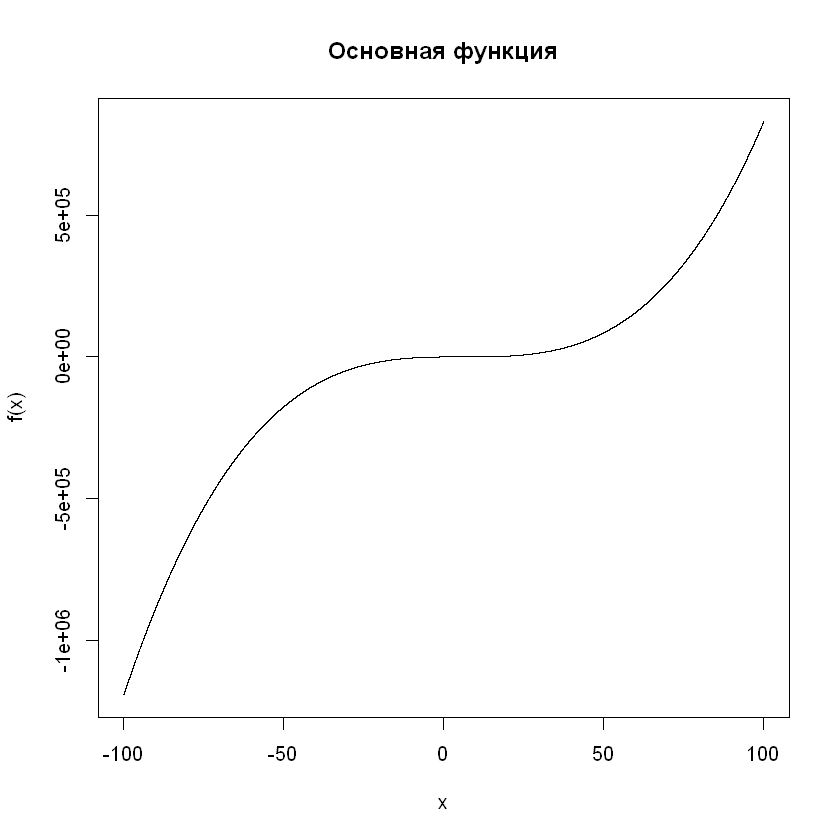

In [23]:
x <- seq(-100, 100, 0.01)

plot(x, f(x), type="l", main="Основная функция")

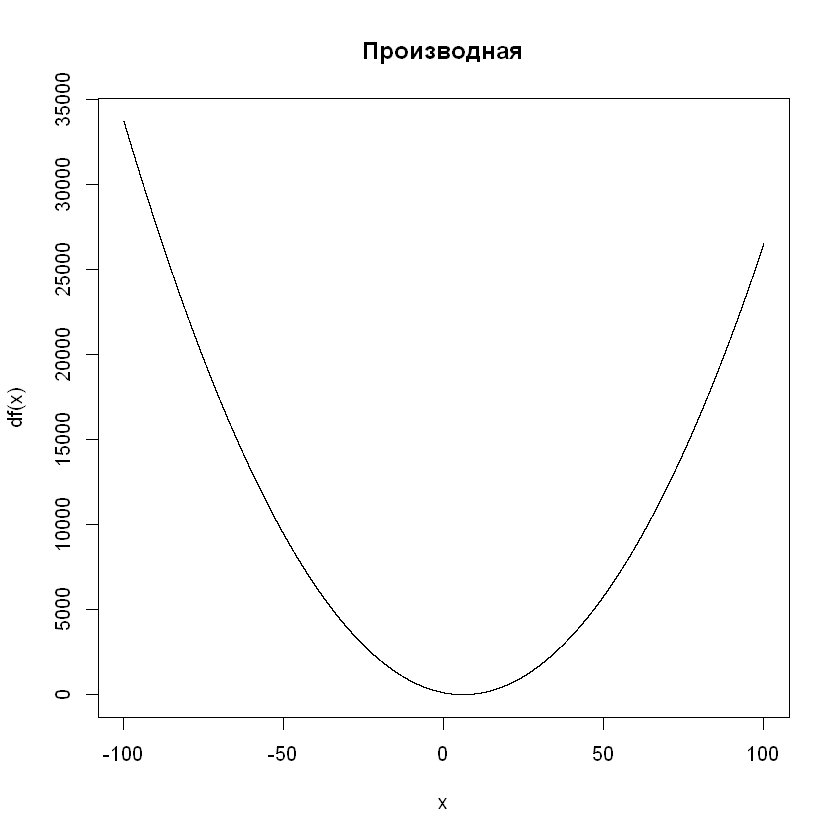

In [24]:
plot(x, df(x), type="l", main="Производная")

## 5

In [25]:
f <- function (x, y, a=1, b=1) {
    x^2 / a^2 + y^2 / b^2 - 1
}
# wrong!!!
f.expr = expression(x^2 / a^2 + y^2 / b^2 - 1)